## Image Processing

In [ ]:
# When building a classifier from a convolutional neural network, we want the model to be robust and generalise well.
# With the image set being used, all shoes are on a white background, more or less of the same size, located in 
# appoximately the same area and at a similar angle. While convolutional neural networks can handle image translations,
# we want our model to also be scale invariant, rotation invariant and background invariant.

# To do this we are going to increase our training set by making copies of each image, which have been rotated at
# multiple angles, scaled to different sizes and backgrounds introduced.

In [1]:
# Load libraries

import pandas as pd
from PIL import Image
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import cv2
%matplotlib inline

In [ ]:
# Load images to process from file

Data = pd.read_csv('Shoe_IDs.csv')
Root_Location = '/Users/annacrawford/Desktop/Images_CNN/'
files=list(Data.id)
files=[''.join(['_',str(x),'_a.jpg']) for x in files]
Image_Order=[x[1:-6] for x in files]

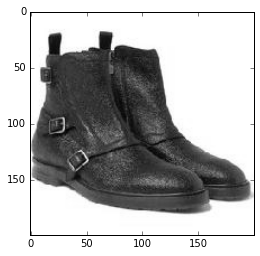

In [41]:
# Original Image

image = Image.open('_2047_a.jpg').convert('L')
image = misc.fromimage(image)
plt.imshow(image, cmap = 'gray')
plt.show()

#### Generate background onto image

In [2]:
# Background images

Background1=Image.open('Background1.jpg').convert('L')
Background2=Image.open('Background2.jpg').convert('L')
Background3=Image.open('Background3.jpg').convert('L')
Background_List=[Background1,Background2,Background3]

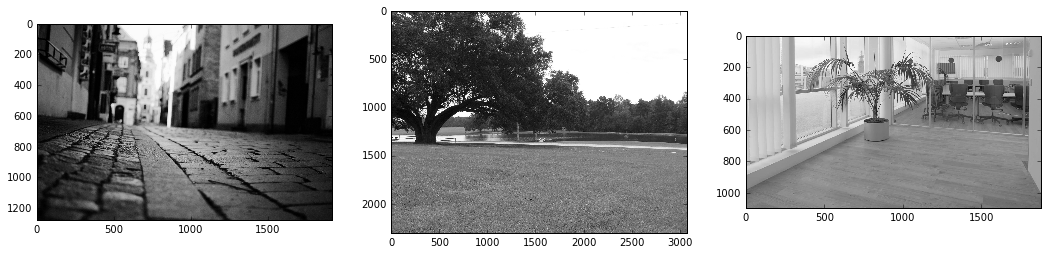

In [12]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.imshow(misc.fromimage(Background1), cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(misc.fromimage(Background2), cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(misc.fromimage(Background3), cmap = 'gray')
plt.show()

In [26]:
# The following function randomly selects a 200 x 200 subsection from the above background images, and then
# imposes it behind the image of the shoe

def Background_Generate(Input_Image):
    Background_Number = rand.randint(0,2) 
    Background_Image = Background_List[Background_Number] # Select at random the background image
    ar = misc.fromimage(Background_Image) # Generate array from image
    h = ar.shape[0] # Height of background image
    w = ar.shape[1] # Width of background image
    y = rand.randint(0, h - 200) # Generate random location to crop
    x = rand.randint(0, w - 200)
    Cropped_Image = Background_Image.crop((x, y, x + 200, y + 200)) # Crop location from background image
    # Input background image into white space of shoe
    Output_Image = np.select([Input_Image < 245], [Input_Image], Cropped_Image) 
    return Output_Image

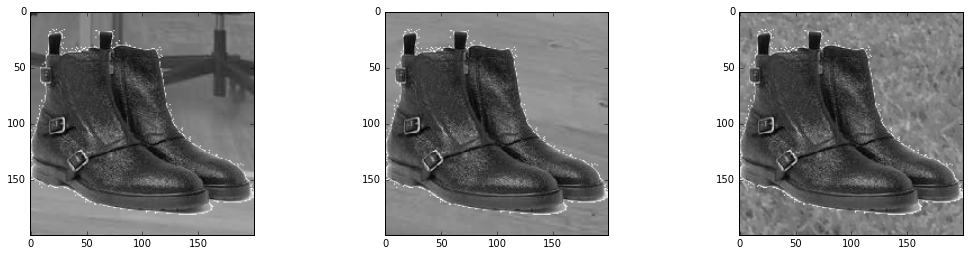

In [32]:
# Generated backgrounds

plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.imshow(Background_Generate(image), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(Background_Generate(image), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(Background_Generate(image), cmap='gray')
plt.show()

#### Rotate shoes

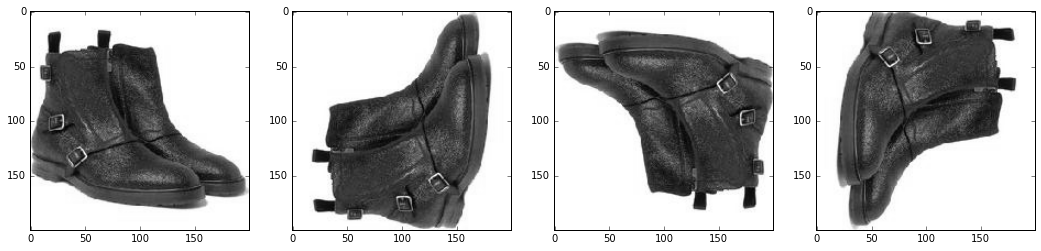

In [35]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(np.rot90(image, 1), cmap='gray') # Rotate image 90 degrees
plt.subplot(1, 4, 3)
plt.imshow(np.rot90(image, 2), cmap='gray') # Rotate image 180 degrees
plt.subplot(1, 4, 4)
plt.imshow(np.rot90(image, 3), cmap='gray') # Rotate image 270 degrees
plt.show()

#### Resize shoes

In [ ]:
# The following function resizes the orginal image to two different sizes and then appends them to a 200 x 200
# white array.

def resize(Input_image):
    Med = cv2.resize(Input_image,(150,150)) # Resize image
    Small = cv2.resize(Input_image,(100,100))
    White_Small = np.empty((200, 200), dtype = Med.dtype) # Create 200 x 200 empty array
    White_Small.fill(255) # Append white to empty array
    White_Med = White_Small.copy()
    White_Small[50:150, 50:150] = Small # Append resized image to the middle of the white array
    White_Med[25:175, 25:175] = Med
    return White_Med, White_Small

In [ ]:
med, small = resize(image)

plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray') # Original image
plt.subplot(1, 3, 2)
plt.imshow(med, cmap='gray') # Small image
plt.subplot(1, 3, 3)
plt.imshow(small, cmap='gray') # Medium image
plt.show()

#### Process all images

In [43]:
Original_Image=[]
Background_Image=[]
Image_Rotate1=[]
Image_Rotate2=[]
Image_Rotate3=[]
Image_Scale1=[]
Image_Scale2=[]

for x in files:
    try:
        dloc =''.join([Root_Location,x])
        ## Import image in greyscale
        im = cv2.imread(dloc,0)

        ## Original image
        Original_Image.append(im)

        ## Add background
        im_N = Background_Generate(im)
        Background_Image.append(im_N)

        ## Scale image
        Med, Small =resize(im)

        ## Scaled image on background
        Med = Background_Generate(Med)
        Image_Scale1.append(Med)

        Small = Background_Generate(Small)
        Image_Scale2.append(Small)

        ## Rotated image on background 
        N_Im = Background_Generate(im)
        
        ar_90 = np.rot90(N_Im, 1)
        Image_Rotate1.append(ar_90)

        ar_180 = np.rot90(N_Im, 2)
        Image_Rotate2.append(ar_180)

        ar_270 = np.rot90(N_Im, 3)
        Image_Rotate3.append(ar_270)
    
    except:
        print 'Error processing image :',x

NameError: name 'files' is not defined

In [ ]:
# Create array from processed images

X = np.array([Original_Image, Background_Image, Image_Rotate1, Image_Rotate2, 
              Image_Rotate3, Image_Scale1, Image_Scale2]) # Not sure if we need this??

X = np.concatenate([Original_Image, Background_Image, Image_Rotate1, Image_Rotate2,
            Image_Rotate3, Image_Scale1, Image_Scale2])

In [ ]:
# Save array
with file('X_Data_Large.npy', 'w') as Xoutfile:
    np.save(Xoutfile,X)

In [ ]:
# Create classification array

y = np.concatenate([Data.Model_1, Data.Model_1, Data.Model_1, Data.Model_1, Data.Model_1, Data.Model_1, Data.Model_1])

In [ ]:
# Save array
with file('y_Data_Large.npy', 'w') as youtfile:    
    np.save(youtfile,y)